In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from math import erfc, sqrt, exp
from math import pi as PI
from math import e as E



In [2]:
SELU_A = -sqrt(2/PI)/(erfc(1/sqrt(2))*exp(1/2)-1)
SELU_L = (1-erfc(1/sqrt(2))*sqrt(E))*sqrt(2*PI) / (2*erfc(sqrt(2))*E*E+PI*erfc(1/sqrt(2))**2*E-2*(2+PI)*erfc(1/sqrt(2))*sqrt(E)+PI+2)**0.5

In [4]:
def heaviside(z):
    """The heaviside function implements the Heaviside function, also known as the step function. This function is defined as 0 for negative values and 1 for positive or zero values. """
    return jnp.where(z < 0, 0, 1)

def sign(z):
    """The sign function returns the sign of a number. It returns 1 if the number is positive, -1 if the number is negative, and 0 if the number is 0. """
    return jnp.where(z < 0, -1, 1)

def sigmoid(z):
    return 1/(1+jnp.exp(-z))

def tanh(z):
    return jnp.tanh(z)

def relu(z):
    return jnp.maximum(0, z)

def leaky_relu(z, alpha=0.05):
    return jnp.maximum(alpha*z, z)

def elu(z, alpha=1):
    y = alpha*(jnp.exp(z)-1)
    return jnp.where(z < 0, y, z)
def selu(z):
    return SELU_L*elu(z, SELU_A)

def derivative(f, z, eps=0.000001):
    return (f(z+eps) - f(z-eps))/(2*eps)

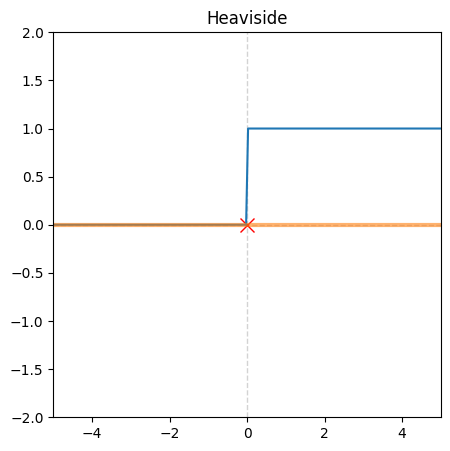

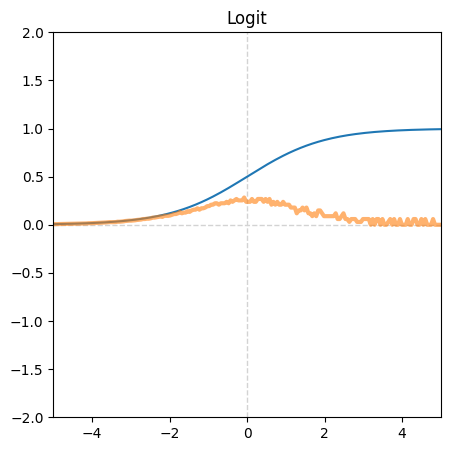

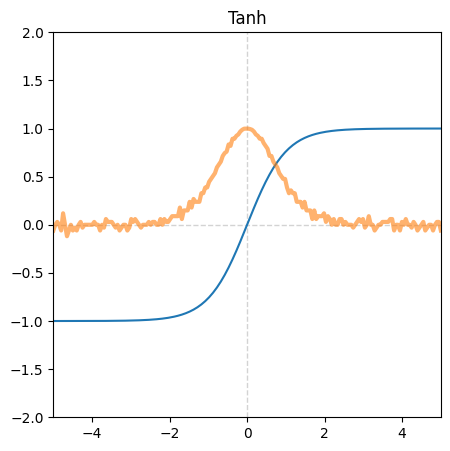

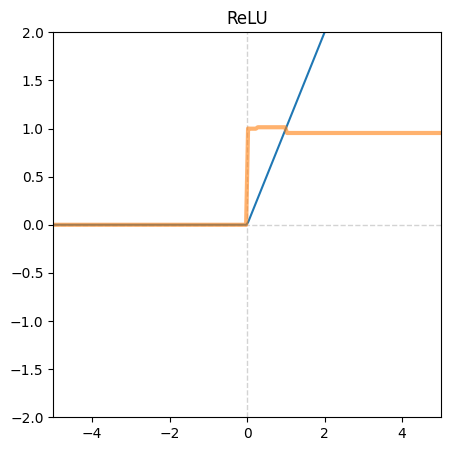

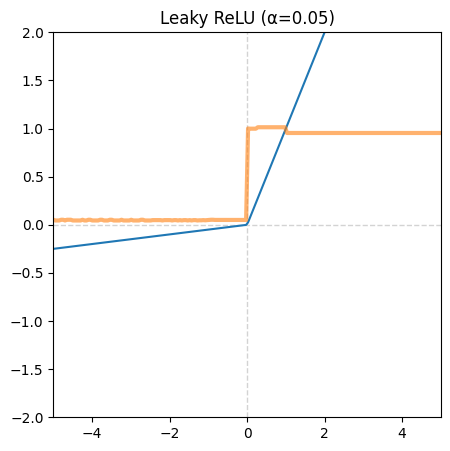

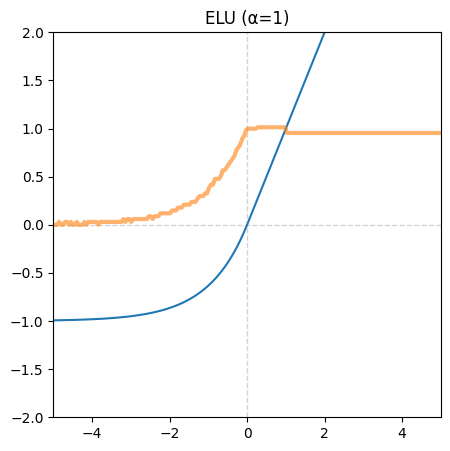

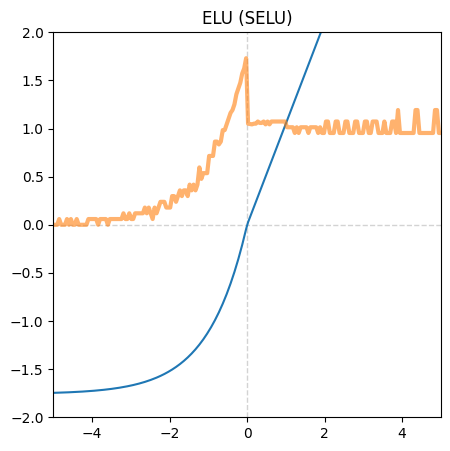

In [5]:
pw=5
ph=5

z = jnp.linspace(-5, 5, 200)


# ------ Heaviside
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(0, 0, "rx", markersize=10)
ax.plot(z, heaviside(z),              linestyle='-',  label="Heaviside")
ax.plot(z, derivative(heaviside, z),  linewidth=3, alpha=0.6, label="dHeaviside/dx")
# ax.plot(z, sign(z),                  label="Heaviside")
ax.set_title("Heaviside")
plt.show()


# ----- Logit/Sigmoid
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, sigmoid(z),             label="Sigmoid")
ax.plot(z, derivative(sigmoid, z), linewidth=3, alpha=0.6, label="dSigmoid/dx")
ax.set_title("Logit")
plt.show()

# ----- Tanh
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, tanh(z),             label="Tanh")
ax.plot(z, derivative(tanh, z), linewidth=3, alpha=0.6, label="dTanh/dx")
ax.set_title("Tanh")
plt.show()

# ----- Relu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, relu(z),             label="ReLU")
ax.plot(z, derivative(relu, z), linewidth=3, alpha=0.6, label="dReLU/dx")
ax.set_title("ReLU")
plt.show()

# ----- Leaky Relu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, leaky_relu(z),              label="Leaky ReLU")
ax.plot(z, derivative( leaky_relu, z), linewidth=3, alpha=0.6, label="dLeakyReLU/dx")
ax.set_title("Leaky ReLU (α=0.05)")
plt.show()

# ----- Elu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, elu(z),              label="ReLU")
ax.plot(z, derivative( elu, z), linewidth=3, alpha=0.6, label="dExpReLU/dx")
ax.set_title("ELU (α=1)")
plt.show()

# ----- Selu
#
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(pw,ph)
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)
ax.axhline(y=0, linewidth=1, linestyle='--', color='lightgray')
ax.axvline(x=0, linewidth=1, linestyle='--', color='lightgray')
ax.plot(z, selu(z),              label="SeLU")
ax.plot(z, derivative( selu, z), linewidth=3, alpha=0.6, label="dSeLU/dx")
ax.set_title("ELU (SELU)")
plt.show()

